In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import *

%matplotlib notebook

In [2]:
fcfs = pd.read_table("16jun_small_fcfs.txt", " ")
llv = pd.read_table("16jun_small_llv.txt", " ")
sjf = pd.read_table("16jun_small_sjf.txt", " ")

def cleanse(df):
    df['dt1'] = df['dt1'] + " " + df['dt2'] + " " + df['dt3']
    df = df.drop(['dt2', 'dt3', 'collisions', 'unknown'], axis=1)
    df['dt1'] = df['dt1'].apply(lambda x: pd.to_datetime(parse(x)))
    minval = df['dt1'].min()
    df['dt1'] = df['dt1'].apply(lambda x: (x - minval).total_seconds() / 3600)
    df = df.sort_values(by='dt1')
    df['costs'] = df['costs'] / 100
    df['profit'] = df['revenue'] - df['penalties'] - df['costs']
    df['avgDelTime'] = df['avgDelTime'] / 60
    df['avgWaitTime'] = df['avgWaitTime'] / 60
    df['delTimes'] = df['avgDelTime'] - df['avgWaitTime']
    df['avgProfitPerDelivery'] = df['profit'] / df['deliveries']
    df['avgRevenuePerDelivery'] = df['revenue'] / df['deliveries']
    return df

fcfs = cleanse(fcfs)
fcfs['rejecValue'] = fcfs['potentialLost']

llv = cleanse(llv)
sjf = cleanse(sjf)

<IPython.core.display.Javascript object>


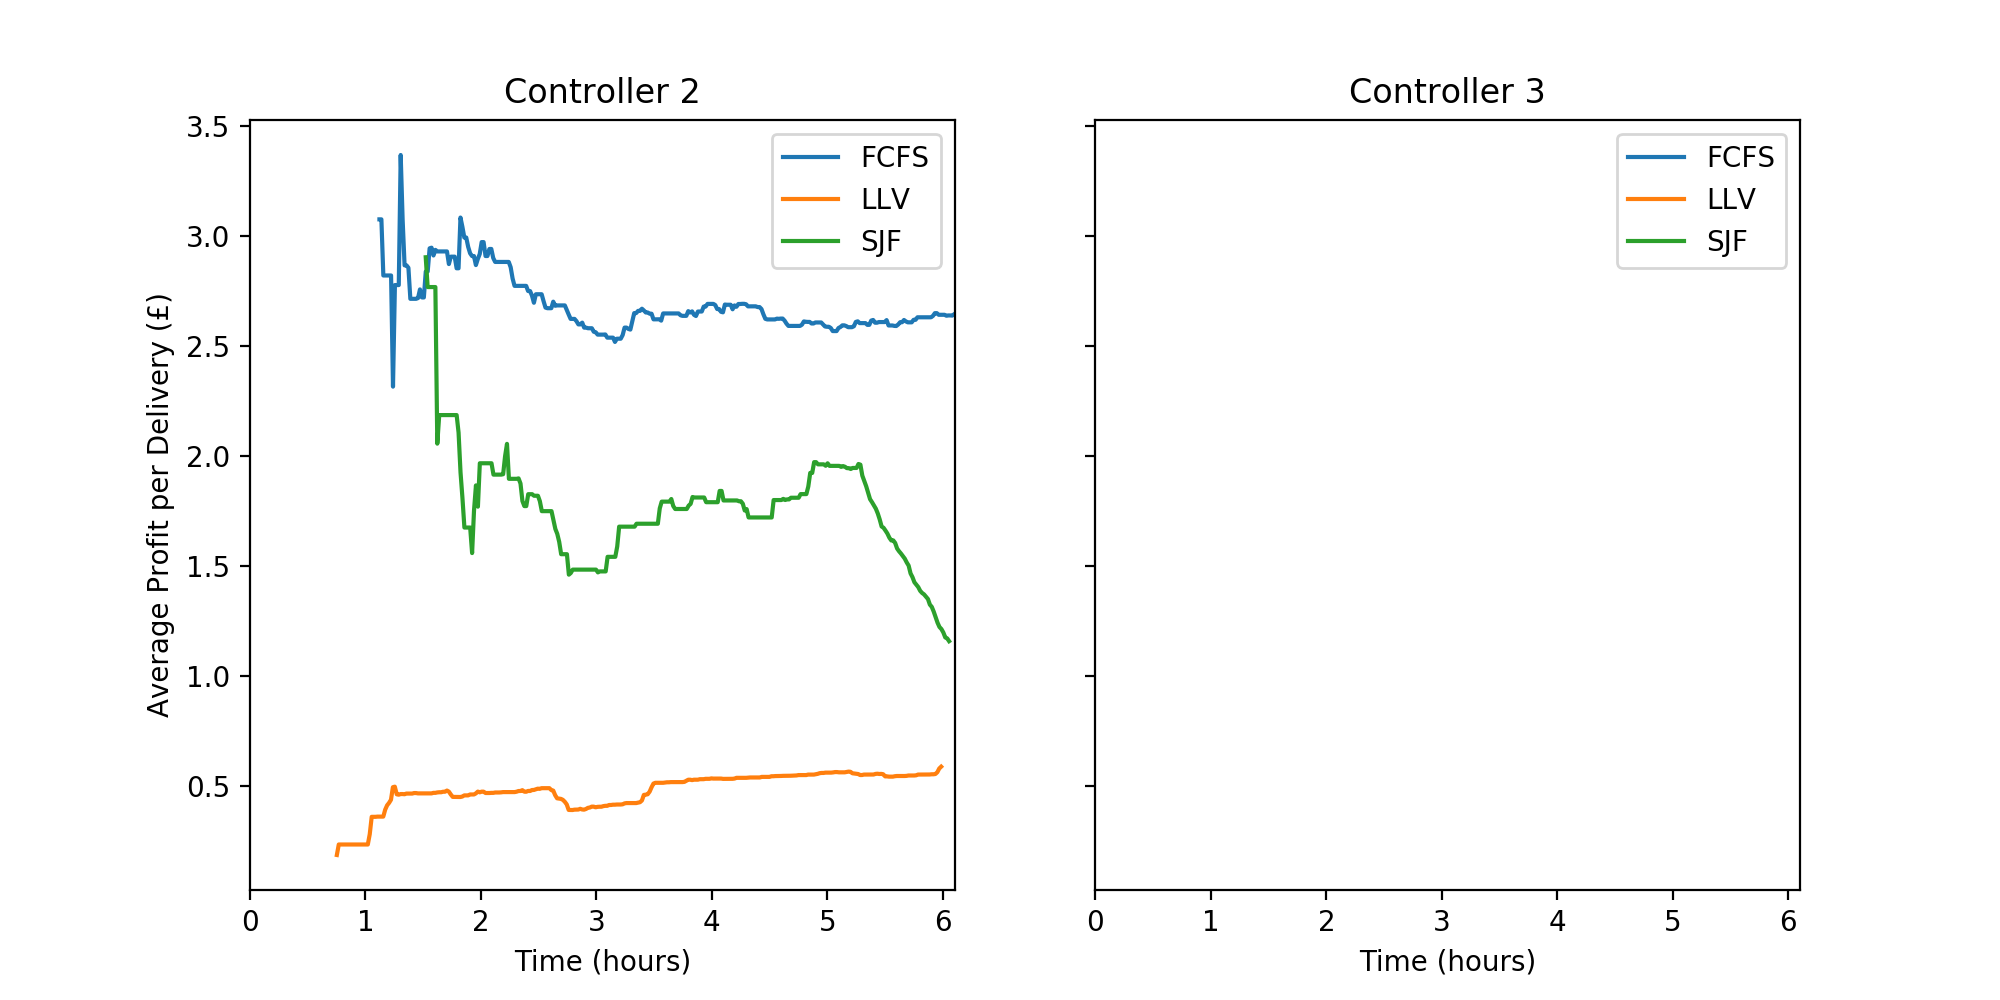

In [10]:
# controller drones queue deliveries fullTrips revenue costs penalties avgDelTime avgWaitTime
# fDel fRet fLaunch collisions unknown rejecValue avgRejecValue potentialLost avgPotentialLost
# profit delTimes avgProfitPerDelivery avgRevenuePerDelivery 
yaxis = 'avgPotentialLost'
yaxis_label = "Average Profit per Delivery (£)"
xaxis_label = "Time (hours)"
numcontrollers = 2

def plotGraphs(controller, yaxis, ax):
    fcfsx = fcfs.loc[fcfs['controller'] == controller]
    llvx = llv.loc[llv['controller'] == controller]
    sjfx = sjf.loc[sjf['controller'] == controller]

    fcfsx.plot(x='dt1', y=yaxis, ax=ax)
    llvx.plot(x='dt1', y=yaxis, ax=ax)
    sjfx.plot(x='dt1', y=yaxis, ax=ax)
    ax.legend(["FCFS", "LLV", "SJF"]);
    ax.set_xlabel(xaxis_label)
    ax.set_ylabel(yaxis_label)
    ax.set_title('Controller ' + str(controller))
    
f, axes = plt.subplots(1, numcontrollers, sharex=True, sharey=True, figsize=(10,5))
for c in range(2, 2+numcontrollers):
    plotGraphs(c, yaxis, axes[c-2])
plt.show()

# fcfs.tail(2)
# llv.tail(2)
# sjf.tail(2)